In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import seaborn as sea
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
#from day_1 import mean_CI_model, mean_CI_data, mean_PI_model, mean_PI_data
import pandas.plotting as pd_plot
import scipy as sc

In [3]:
def mean_CI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = se * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96 / np.sqrt(n)
    return m, m - h, m + h


def mean_CI_model(mu, std, n, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std / np.sqrt(n)
    return m, m - h, m + h


def mean_PI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = std * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96
    return m, m - h, m + h


def mean_PI_model(mu, std, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std
    return m, m - h, m + h



# Exercise 1.1


count    85.000000
mean     24.991765
std       3.580044
min      16.900000
25%      22.300000
50%      25.600000
75%      27.700000
max      31.700000
Name: bmi, dtype: float64

 
Confidence interval 95%: 
stats function
(24.21969975269786, 25.76382965906684)

 
Test to see if the mean BMI= 24.1 kg/m2: 
Ttest_1sampResult(statistic=2.296525879415573, pvalue=0.024135327161518918)

 
Confidence interval 95%: 
(24.235166708167483, 25.748362703597216)


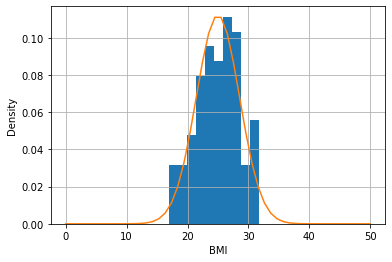

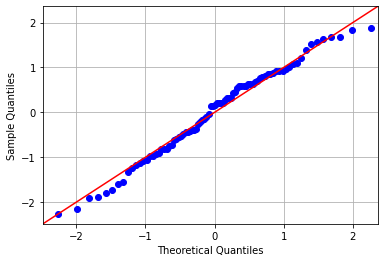

In [4]:
BMI_women = pd.read_csv('data/bmiwomen.csv', sep=',', na_values=".")

print(BMI_women['bmi'].describe()) # generate descriptive statistics

## histogram of the data and gaussian fit
mu, std = stats.norm.fit(BMI_women['bmi'])
x = np.linspace(0, 50)
pdf_data = stats.norm.pdf(x, mu, std)

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.hist(BMI_women['bmi'], bins=10, density='True')
ax.plot(x, pdf_data)
ax.set_xlabel('BMI')
ax.set_ylabel('Density')
ax.grid()
plt.show()

## QQ plot
sm.qqplot(BMI_women['bmi'], fit=True, line='45')
plt.grid()

## CI and T-test
print('\n \nConfidence interval 95%: ')
print('stats function')
print(stats.t.interval(0.95, len(BMI_women['bmi'] - 1),
                       loc=mu, scale=stats.sem(BMI_women['bmi'])))

print('\n \nTest to see if the mean BMI= 24.1 kg/m2: ')
print(stats.ttest_1samp(BMI_women['bmi'], popmean=24.1))

## With user defined functions:
print('\n \nConfidence interval 95%: ')
print(mean_CI_data(BMI_women['bmi'])[1:])

solutions
CI =  (24.21957, 25.76396).  Ttest = 2.2965

# Exercise 1.2

Cord blood serum triglyceride level from 427 babies

#### 1)
Find a 95% confidence interval for the mean based on sample number 5.
Compare the interval with the interval based on the four other samples (see table 1.2
below).

In [5]:
Trigly = pd.read_csv('data/trigly.csv', sep=',', na_values=".")
print(Trigly['trigly'].describe(), '\n')
#Trigly['trigly'] = np.log(Trigly['trigly'])

# groupping by sample
group_by_samples = Trigly.groupby('sample')
for sample, value in group_by_samples:
    mu = value.mean()['trigly']
    std = value.std()['trigly']
    print('Sample=',sample, ', mu=', mu,
          ', std=', std,
          #', median=', stats.t.interval(0.95, len(value['trigly']),
          #             loc=mu, scale=stats.sem(value['trigly'])),
          ', 95% CI=', mean_CI_data(value['trigly'])[1:],
          '\n')

count    427.000000
mean       0.499532
std        0.212191
min        0.150000
25%        0.350000
50%        0.460000
75%        0.595000
max        1.660000
Name: trigly, dtype: float64 

Sample= 1 , mu= 0.4962162162162161 , std= 0.20014371713223353 , 95% CI= (0.43260296990607927, 0.5598294625263531) 

Sample= 2 , mu= 0.4697560975609756 , std= 0.1897562621480257 , 95% CI= (0.412384317181034, 0.5271278779409172) 

Sample= 3 , mu= 0.4845454545454545 , std= 0.17963662817426235 , 95% CI= (0.424190626728302, 0.5449002823626071) 

Sample= 4 , mu= 0.5008823529411766 , std= 0.22803997054023856 , 95% CI= (0.42536528830885745, 0.5763994175734957) 

Sample= 5 , mu= 0.5058865248226947 , std= 0.21913797769836854 , 95% CI= (0.48035494006774704, 0.531418109577643) 



#### 2)
Find a 95% prediction interval for a new observation based on all the data.
Compare with the intervals based on each of the samples.

In [6]:
# prediction interval per sample
for sample, value in group_by_samples:
    mu = np.exp(value.mean()['trigly'])
    std = value.std()['trigly']
    print('Sample=',sample, '95% PI=',
          mean_PI_data(value['trigly'], 0.95)[1:],
          '\n')

# prediction interval for new data based on all the samples
print('95% PI = ', mean_PI_data(Trigly['trigly'], 0.95)[1:])

Sample= 1 95% PI= (0.10927194513028382, 0.8831604873021486) 

Sample= 2 95% PI= (0.10239746006549738, 0.8371147350564538) 

Sample= 3 95% PI= (0.13783336512880556, 0.8312575439621035) 

Sample= 4 95% PI= (0.060545981830200324, 0.9412187240521528) 

Sample= 5 95% PI= (0.07713830818740192, 0.9346347414579881) 

95% PI =  (0.08412402169145555, 0.9149392101586615)


3) Find the percentage of babies with a value below the lower limit and the
percentage of babies with a value above the upper limit in the prediction interval
based on the whole sample (Hint: List the data after sorting them, or use the
command -count- combined with an appropriate if-statement). Is it fair to interpret
the computed intervals as 95%- prediction intervals?

In [7]:
lower_vals = []
upper_vals = []
mu = np.mean(Trigly['trigly'])
PI = mean_PI_data(Trigly['trigly'], 0.95)[1:]
for i in Trigly['trigly']:
    if i>PI[1]:
        upper_vals.append(i)
    elif i<PI[0]:
        lower_vals.append(i)
print('% babies above the upper limit: ',
      100 * len(upper_vals)/len(Trigly['trigly']),'%')
print('% babies below the lower limit: ',
      100 * len(lower_vals)/len(Trigly['trigly']),'%')

% babies above the upper limit:  4.215456674473068 %
% babies below the lower limit:  0.0 %


4) Make a histogram and QQ-plot for the whole data set. Discuss the validity of
the assumptions behind the analyses you have made.

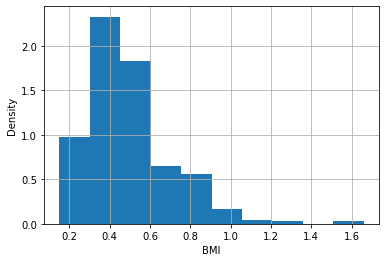

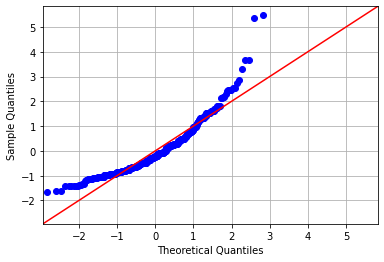

In [8]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.hist(Trigly['trigly'], bins=10, density='True')
ax.set_xlabel('BMI')
ax.set_ylabel('Density')
ax.grid()
plt.show()

## QQ plot
sm.qqplot(Trigly['trigly'], fit=True, line='45')
plt.grid()

Our hypothesis of a normally distributed data set was not correct!!

# Exercise 1.3

Siblings data set

    sex1st sex2nd  weight1st  weight2nd
0      boy    boy       3740       3740
1      boy   girl       3060       3620
2      boy    boy       3650       3700
3     girl   girl       3688       3726
4      boy   girl       3740       3000
..     ...    ...        ...        ...
995   girl    boy       3500       2950
996    boy   girl       3020       3800
997    boy    boy       3400       3540
998    boy    boy       2800       3730
999    boy   girl       4000       3600

[1000 rows x 4 columns]
         weight1st    weight2nd         wdif
count   234.000000   234.000000   234.000000
mean   3544.722222  3725.576923   180.854701
std     524.875840   504.869486   534.317474
min    1330.000000  2010.000000 -2440.000000
25%    3281.250000  3450.000000  -140.000000
50%    3600.000000  3720.000000   175.000000
75%    3897.500000  4000.000000   500.000000
max    4770.000000  5250.000000  2080.000000


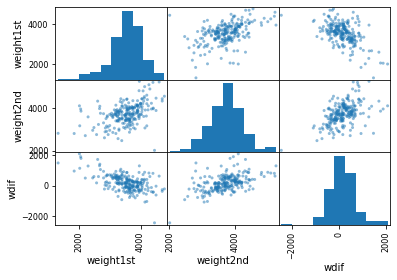

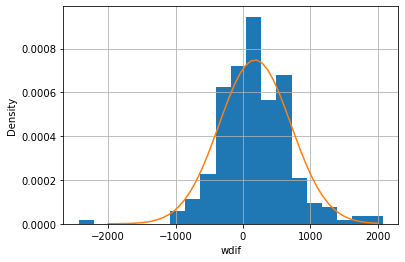

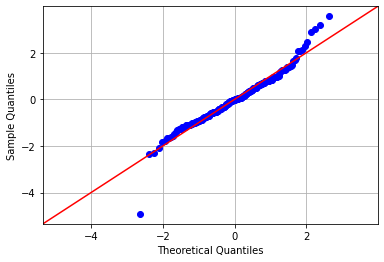

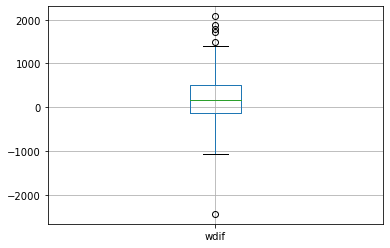

In [9]:
Siblings = pd.read_csv('data/siblings.csv', sep=',', na_values=".")
print(Siblings)
Siblings['wdif'] = Siblings['weight2nd'] - Siblings['weight1st']

Siblings_bb = Siblings.loc[Siblings['sex1st'] == 'boy']
Siblings_bb = Siblings_bb.loc[Siblings_bb['sex2nd'] == 'boy']

print(Siblings_bb.describe())
import pandas.plotting as pd_plot
pd_plot.scatter_matrix(Siblings_bb[['weight1st', 'weight2nd', 'wdif']])


## histogram
mu, std = stats.norm.fit(Siblings_bb['wdif'])
x = np.linspace(-2000, 2000)
pdf_data = stats.norm.pdf(x, mu, std)

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.hist(Siblings_bb['wdif'], bins=20, density='True')
ax.plot(x, pdf_data)
ax.set_xlabel('wdif')
ax.set_ylabel('Density')
ax.grid()
plt.show()

## QQ plot
plt.rcParams.update({'font.size': 10})
sm.qqplot(Siblings_bb['wdif'], fit=True, line='45')
plt.grid()
plt.show()

## box plot
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
Siblings_bb.boxplot(column=['wdif'])
plt.show()

Find a 95% confidence interval of the mean difference in birth weight.
Is the mean birth weight different for the two brothers? If so, how different?

In [73]:
print('weight diff (2nd-1st)')
print('mu=', np.mean(Siblings_bb['wdif']),
    ', std=', np.std(Siblings_bb['wdif']),
    ', 95% CI=', mean_CI_data(Siblings_bb['wdif'])[1:],
    '\n')

print('weight 1st brother')
print('mu=', np.mean(Siblings_bb['weight1st']),
    ', std=', np.std(Siblings_bb['weight1st']),
    ', 95% CI=', mean_CI_data(Siblings_bb['weight1st'])[1:],
    '\n')

print('weight 2nd brother')
print('mu=', np.mean(Siblings_bb['weight2nd']),
    ', std=', np.std(Siblings_bb['weight2nd']),
    ', 95% CI=', mean_CI_data(Siblings_bb['weight2nd'])[1:],
    '\n')

weight diff (2nd-1st)
mu= 180.85470085470087 , std= 533.1745479167944 , 95% CI= (112.53946814959392, 249.16993355980782) 

weight 1st brother
mu= 3544.722222222222 , std= 523.7531100388842 , 95% CI= (3477.614150893368, 3611.8302935510765) 

weight 2nd brother
mu= 3725.576923076923 , std= 503.78955005985074 , 95% CI= (3661.026766882838, 3790.127079271008) 



Find a 95% prediction interval of the difference in birth weight.
Write an interpretation of this interval.

In [72]:
print('95% PI = ', mean_PI_data(Siblings_bb['wdif'], 0.95)[1:])

# More than half of the times, the second brother will be heavier

95% PI =  (-864.1674130622162, 1225.876814771618)


Test the hypothesis of no difference in the mean birth weight for two brothers.


In [74]:
# we will check what is the p-value of mu=0
print(stats.ttest_1samp(Siblings_bb['wdif'], popmean=0))

# the p-value is extremaly small -> unlikely that the no difference
# hypothesis is true

Ttest_1sampResult(statistic=5.177717517009066, pvalue=4.852658140703294e-07)


Write a summary of the analysis.

-. * Must contain:
. * Comments to model assumptions
. * Estimate of the CI and PI making reference to lower and upper limits
. * Understand differences between estimated mean difference (mean, CI) and
. * expected observed difference (PI)

## Exercise 1.5
We now return to the triglyceride data from exercise 1.2 above.
Generate a new variable containing the natural logarithms of the triglyceride levels and
call it lntri

